## Visualizing the trained filters

In [17]:
# some startup! 
import numpy as np
import matplotlib
# This is needed to save images 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import torch

In [18]:
# load the model saved by train.py
# This will be an instance of models.softmax.Softmax.
# NOTE: You may need to change this file name.
model_names = ['softmax','twolayernn', 'convnet', 'mymodel']
model_name =  model_names[3] # Pick which model to use
model = torch.load(model_name + '.pt')

In [19]:
# collect all the weights
w = None
#############################################################################
# TODO: Extract the weight matrix (without bias) from softmax_model, convert
# it to a numpy array with shape (10, 32, 32, 3), and assign this array to w.
# The first dimension should be for channels, then height, width, and color.
# This step depends on how you implemented models.softmax.Softmax.
#############################################################################
if model_name == 'softmax':
    w = model.fc1.weight.data.numpy()
    w = w.reshape((10,32,32, 3)) # visualize weights for softmax 
elif model_name == 'twolayernn':
    w = model.net[0].weight.data.numpy()
    w = w.reshape([100, 32, 32, 3])  # visualize weights for twolayernn
elif model_name == 'convnet':
    from vis_utils import visualize_grid
    w = model.conv1.weight.data.numpy()
    w = w.transpose(0,3,1,2)
elif model_name == 'mymodel':
    w = model.conv1.weight.data.numpy()
    w = w.transpose(0,3,1,2)  # visualize weights for mymodel
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################
# obtain min,max to normalize
w_min, w_max = np.min(w), np.max(w)
# classes
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# init figure 
fig = plt.figure(figsize=(6,6))
for i in range(10):
    wimg = 255.0*(w[i].squeeze() - w_min) / (w_max - w_min)
    if model_name == 'convnet':
        # subplot is (1,1) as three filters are to be visualized
        fig.add_subplot(9,2,i+1).imshow(wimg.astype('uint8'))
    else:
        # subplot is (2,5) as ten filters are to be visualized
        fig.add_subplot(2,5,i+1).imshow(wimg.astype('uint8'))
# save fig! 
fig.savefig(model_name + '_filt.png')
print('figure saved')

figure saved


In [20]:
# vis_utils.py has helper code to view multiple filters in single image. Use this to visuzlize 
# neural network adn convnets. 
# import vis_utils
from vis_utils import visualize_grid
# saving the weights is now as simple as:
plt.imsave(model_name + '_gridfilt.png',visualize_grid(w, padding=3).astype('uint8'))
# padding is the space between images. Make sure that w is of shape: (N,H,W,C)
print('figure saved as a grid!')

figure saved as a grid!


In [21]:
# Assuming that you have completed training the classifer, let us plot the training loss vs. iteration. This is an
# example to show a simple way to log and plot data from PyTorch.

# we neeed matplotlib to plot the graphs for us!
import matplotlib
# This is needed to save images 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Parse the train and val losses one line at a time.
import re
# regexes to find train and val losses on a line
float_regex = r'[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?'
train_loss_re = re.compile('.*Train Loss: ({})'.format(float_regex))
val_loss_re = re.compile('.*Val Loss: ({})'.format(float_regex))
val_acc_re = re.compile('.*Val Acc: ({})'.format(float_regex))
# extract one loss for each logged iteration
train_losses = []
val_losses = []
val_accs = []
# NOTE: You may need to change this file name.
with open(model_name + '.log', 'r') as f:
    for line in f:
        train_match = train_loss_re.match(line)
        val_match = val_loss_re.match(line)
        val_acc_match = val_acc_re.match(line)
        if train_match:
            train_losses.append(float(train_match.group(1)))
        if val_match:
            val_losses.append(float(val_match.group(1)))
        if val_acc_match:
            val_accs.append(float(val_acc_match.group(1)))

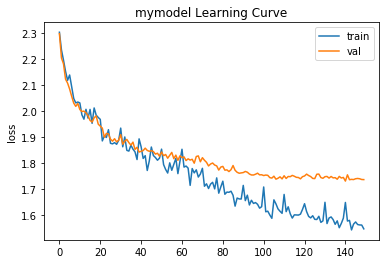

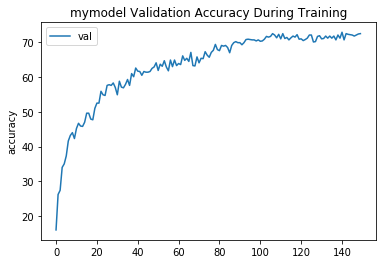

In [23]:
fig = plt.figure()
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.title(model_name + ' Learning Curve')
plt.ylabel('loss')
plt.legend()
fig.savefig(model_name + '_lossvstrain.png')

fig = plt.figure()
plt.plot(val_accs, label='val')
plt.title(model_name + ' Validation Accuracy During Training')
plt.ylabel('accuracy')
plt.legend()
fig.savefig(model_name +'_valaccuracy.png')